In [1]:
%matplotlib inline

In [2]:
from wg1template.histogram_plots import *
from wg1template.point_plots import *
from wg1template.plot_style import TangoColors
from wg1template.plot_utilities import export

cycler('color', ['#4664aa', '#df9b1b', '#009682', '#a22223', '#a3107c', '#a7822e', '#fce500', '#4e4e4e', '#23a1e0', '#8cb63c'])
cycler('color', ['#3465a4', '#f57900', '#73d216', '#cc0000', '#75507b', '#c17d11', '#edd400', '#555753', '#d3d7cf'])


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from uncertainties import correlated_values, ufloat, nominal_value

In [4]:
from eFFORT.utility import PDG
from eFFORT.SLBToU.BToVLNu import BToVLNuEvtGenBelle, BToVLNuBCL
from eFFORT.SLBToU.BToPLNu import BToPLNuEvtGenBelle, BToPLNuBCL

In [5]:
evtgen_pi = BToPLNuEvtGenBelle(m_B=PDG.m_Bzero, m_P=0.13957, m_L=0, V_ub=3.72e-3)
evtgen_rho = BToVLNuEvtGenBelle(m_B=PDG.m_Bzero, m_V=0.775, m_L=0, V_ub=3.72e-3)
evtgen_omega = BToVLNuEvtGenBelle(m_B=PDG.m_Bzero, m_V=0.782, m_L=0, V_ub=3.72e-3)

In [6]:
lqcd_Bpi = np.load('../data/Bpi_LQCDwithExp_central.npy')
lqcd_Bpi_cov = np.load('../data/Bpi_LQCDwithExp_covariance.npy')
lcsr_Brho = np.load('../data/Brho_LCSR_central.npy')
lcsr_Brho_cov = np.load('../data/Brho_LCSR_covariance.npy')
lcsr_Bomega = np.load('../data/Bomega_LCSR_central.npy')
lcsr_Bomega_cov = np.load('../data/Bomega_LCSR_covariance.npy')

lqcd_Bpi_correlated = correlated_values(lqcd_Bpi, lqcd_Bpi_cov)
lcsr_Brho_correlated = correlated_values(lcsr_Brho, lcsr_Brho_cov)
lcsr_Bomega_correlated = correlated_values(lcsr_Bomega, lcsr_Bomega_cov)

bcl_pi = BToPLNuBCL(m_B=PDG.m_Bzero, m_P=0.13957, m_L=0, V_ub=3.72e-3)
bcl_pi.coefficients = lqcd_Bpi#_correlated

bcl_rho = BToVLNuBCL(m_B=PDG.m_Bzero, m_V=0.775, m_L=0, V_ub=3.72e-3)
bcl_rho.coefficients = lcsr_Brho#_correlated

bcl_omega = BToVLNuBCL(m_B=PDG.m_Bzero, m_V=0.782, m_L=0, V_ub=3.72e-3)
bcl_omega.coefficients = lcsr_Bomega#_correlated

In [7]:
q2range_pi = np.linspace(bcl_pi.q2min, bcl_pi.q2max)
q2range_rho = np.linspace(bcl_rho.q2min, bcl_rho.q2max)
q2range_omega = np.linspace(bcl_omega.q2min, bcl_omega.q2max)

In [8]:
variable = DataVariable(r"$q^2$", r"GeV", r"$1 / \Gamma \times \mathrm{d}\Gamma / \mathrm{d}q^2$", "")
def figsize(x):
    golden_ratio = 1.61803398875 
    return (golden_ratio * x, x)

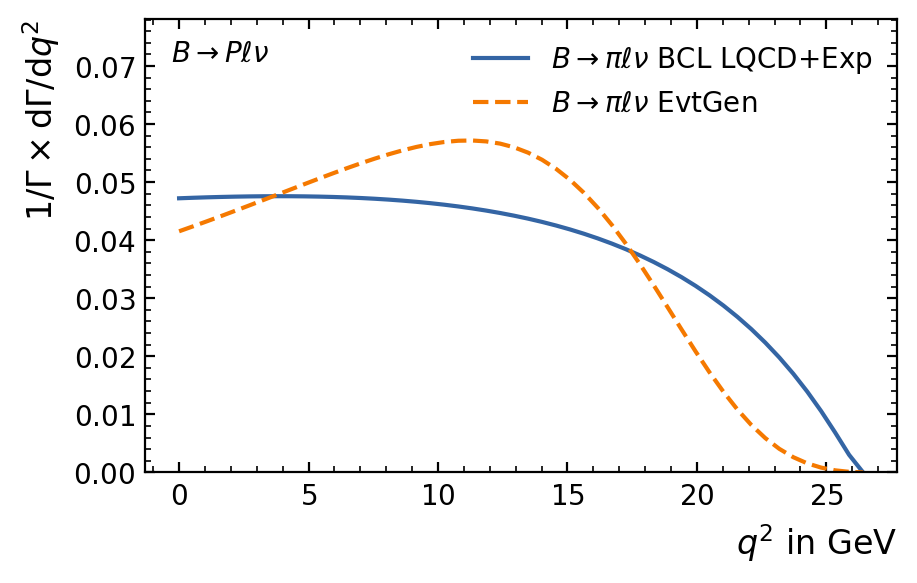

In [9]:
dp = DataPointsPlot(variable)

fig, ax = create_solo_figure(figsize=figsize(3))

ax.plot(q2range_pi, bcl_pi.dGamma_dq2(q2range_pi) / bcl_pi.Gamma(),
         label=r'$B \rightarrow \pi \ell \nu$ BCL LQCD+Exp')
ax.plot(q2range_pi, evtgen_pi.dGamma_dq2(q2range_pi) / evtgen_pi.Gamma(),
         label=r'$B \rightarrow \pi \ell \nu$ EvtGen', ls='--')

dp.plot_on(ax)
ax.set_ylim(0, ax.get_ylim()[1])

add_descriptions_to_plot(
    ax,
    experiment='',
    luminosity='',
    additional_info=r'$B \rightarrow P \ell \nu$'
)

plt.show()
plt.close()

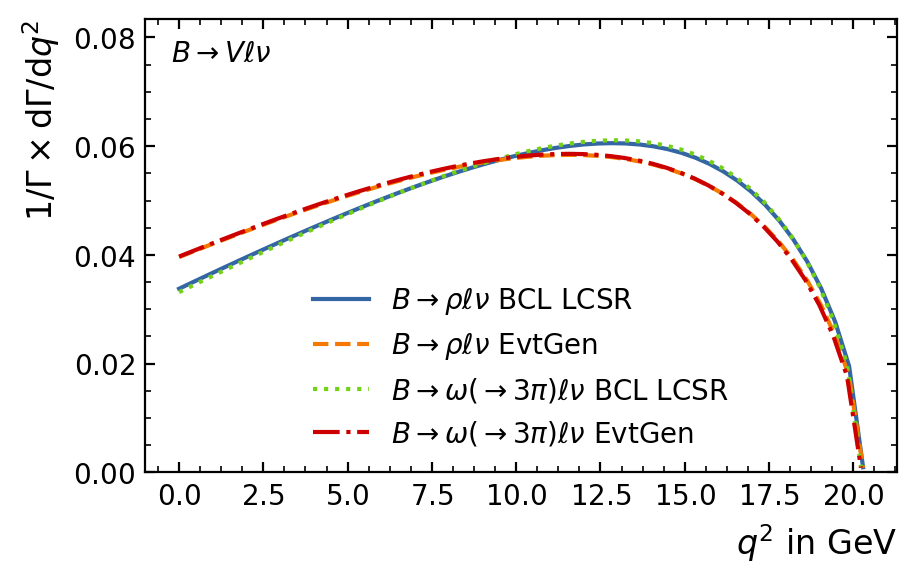

In [10]:
dp = DataPointsPlot(variable)

fig, ax = create_solo_figure(figsize=figsize(3))

ax.plot(q2range_rho, bcl_rho.dGamma_dq2(q2range_rho) / bcl_rho.Gamma(),
         label=r'$B \rightarrow \rho \ell \nu$ BCL LCSR')
ax.plot(q2range_rho, evtgen_rho.dGamma_dq2(q2range_rho) / evtgen_rho.Gamma(),
         label=r'$B \rightarrow \rho \ell \nu$ EvtGen', ls='--')

ax.plot(q2range_omega, bcl_omega.dGamma_dq2(q2range_omega) / bcl_omega.Gamma(),
         label=r'$B \rightarrow \omega(\rightarrow 3\pi) \ell \nu$ BCL LCSR', ls=':')
ax.plot(q2range_omega, evtgen_omega.dGamma_dq2(q2range_omega) / evtgen_omega.Gamma(),
         label=r'$B \rightarrow \omega(\rightarrow 3\pi) \ell \nu$ EvtGen', ls='-.')

dp.plot_on(ax)
ax.set_ylim(0, ax.get_ylim()[1])

add_descriptions_to_plot(
    ax,
    experiment='',
    luminosity='',
    additional_info=r'$B \rightarrow V \ell \nu$'
)

plt.show()
plt.close()